In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [88]:
predictions = pd.read_csv("../model_outputs/all_weeks_predictions.csv")

In [89]:
predictions['date'] = pd.to_datetime(predictions['date'])

In [62]:
all_cases = pd.read_csv("../Data/NYT_clean.csv")

In [5]:
all_merged = pd.read_csv("../Data/merged.csv")

In [14]:
all_cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163822 entries, 0 to 163821
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   state                  163822 non-null  object        
 1   fips                   163822 non-null  int64         
 2   county                 163822 non-null  object        
 3   date                   163822 non-null  datetime64[ns]
 4   cumulative_cases       163822 non-null  float64       
 5   cumulative_deaths      163822 non-null  float64       
 6   new_cases              163822 non-null  float64       
 7   new_deaths             163822 non-null  float64       
 8   new_cases_7avg         163822 non-null  float64       
 9   new_deaths_7avg        163822 non-null  float64       
 10  2weeksago_cases_7avg   163822 non-null  float64       
 11  2weeksago_deaths_7avg  163822 non-null  float64       
dtypes: datetime64[ns](1), float64(8), int64(1), 

In [63]:
all_cases['date'] = pd.to_datetime(all_cases['date'])

In [8]:
all_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128854 entries, 0 to 128853
Data columns (total 88 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   state                                 128854 non-null  object 
 1   fips                                  128854 non-null  int64  
 2   county                                128854 non-null  object 
 3   date                                  128854 non-null  object 
 4   cumulative_cases                      128854 non-null  float64
 5   cumulative_deaths                     128854 non-null  float64
 6   new_cases                             128854 non-null  float64
 7   new_deaths                            128854 non-null  float64
 8   new_cases_7avg                        128854 non-null  float64
 9   new_deaths_7avg                       128854 non-null  float64
 10  2weeksago_cases_7avg                  128854 non-null  float64
 11  

In [7]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2135 entries, 0 to 2134
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2135 non-null   int64  
 1   state       2135 non-null   object 
 2   county      2135 non-null   object 
 3   fips        2135 non-null   int64  
 4   predicted   2135 non-null   float64
 5   date        2135 non-null   object 
 6   new_cases   1521 non-null   float64
 7   residual    1521 non-null   float64
 8   total_pop   2135 non-null   int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 150.2+ KB


In [16]:
predictions

,Unnamed: 0,state,county,fips,predicted,date,new_cases,residual,total_pop
0,0,IL,Adams,17001,10.0,2021-05-28,4.0,-6.0,66085
1,1,IL,Adams,17001,10.0,2021-05-29,5.0,-5.0,66085
2,2,IL,Adams,17001,10.0,2021-05-30,5.0,-5.0,66085
3,3,IL,Adams,17001,11.0,2021-05-31,1.0,-10.0,66085
4,4,IL,Adams,17001,10.0,2021-06-01,4.0,-6.0,66085
...,...,...,...,...,...,...,...,...,...
2130,2130,OH,Wyandot,39175,2.0,2021-05-30,0.0,-2.0,22000
2131,2131,OH,Wyandot,39175,2.0,2021-05-31,0.0,-2.0,22000
2132,2132,OH,Wyandot,39175,2.0,2021-06-01,1.0,-1.0,22000
2133,2133,OH,Wyandot,39175,2.0,2021-06-02,NaN,NaN,22000


In [64]:
cook_cases = all_cases[all_cases['fips'] == 17031]

In [91]:
cook_cases_may = cook_cases[(cook_cases['date'] >= '2021-05-01')]

In [92]:
cook_cases_may

,state,fips,county,date,cumulative_cases,cumulative_deaths,new_cases,new_deaths,new_cases_7avg,new_deaths_7avg,2weeksago_cases_7avg,2weeksago_deaths_7avg
6767,IL,17031,Cook,2021-05-01,535614.0,10515.0,1152.0,8.0,1040.0,12.0,1288.0,10.0
6768,IL,17031,Cook,2021-05-02,536384.0,10525.0,770.0,10.0,1031.0,11.0,1274.0,10.0
6769,IL,17031,Cook,2021-05-03,537224.0,10542.0,840.0,17.0,1032.0,12.0,1238.0,9.0
6770,IL,17031,Cook,2021-05-04,538095.0,10551.0,871.0,9.0,1017.0,12.0,1218.0,9.0
6771,IL,17031,Cook,2021-05-05,539005.0,10563.0,910.0,12.0,1014.0,12.0,1170.0,8.0
6772,IL,17031,Cook,2021-05-06,539645.0,10575.0,640.0,12.0,907.0,11.0,1149.0,8.0
6773,IL,17031,Cook,2021-05-07,541017.0,10590.0,1372.0,15.0,936.0,12.0,1104.0,9.0
6774,IL,17031,Cook,2021-05-08,541692.0,10599.0,675.0,9.0,868.0,12.0,1099.0,8.0
6775,IL,17031,Cook,2021-05-09,542450.0,10611.0,758.0,12.0,867.0,12.0,1067.0,10.0
6776,IL,17031,Cook,2021-05-10,543111.0,10618.0,661.0,7.0,841.0,11.0,1064.0,9.0


In [97]:
cook_pred = predictions[predictions['fips'] == 17031]

In [94]:
predictions_cook_may = predictions[(predictions['fips'] == 17031) & (predictions['date'] >= '2021-05-01')]

In [95]:
predictions_cook_may.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34 entries, 4782 to 4815
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Unnamed: 0        34 non-null     int64         
 1   state             34 non-null     object        
 2   county            34 non-null     object        
 3   fips              34 non-null     int64         
 4   predicted         34 non-null     float64       
 5   date              34 non-null     datetime64[ns]
 6   new_cases_7avg_y  27 non-null     float64       
 7   total_pop         27 non-null     float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(2)
memory usage: 2.4+ KB


In [99]:
cook_cases_best = all_cases[(all_cases['fips'] == 17031) & (all_cases['date'] >= '2020-07-31')]

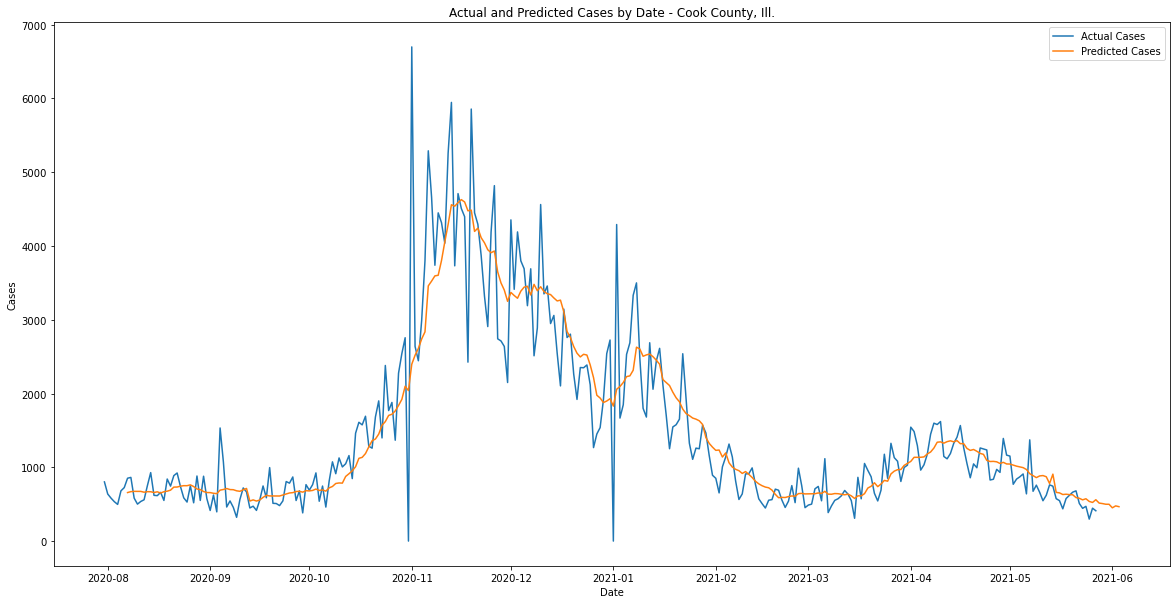

In [102]:
# limit to cook county
# zoom in on May

fix, ax = plt.subplots(figsize=(20,10))
plt.plot(cook_cases_best['date'], cook_cases_best['new_cases'], label='Actual Cases')
plt.plot(cook_pred['date'], cook_pred['predicted'], label='Predicted Cases')
#ax.plot(il_to_plt, label='_nolegend_')
plt.title("Actual and Predicted Cases by Date - Cook County, Ill.")
plt.ylabel("Cases")
plt.xlabel("Date")
plt.legend()
plt.show()

In [32]:
fix, ax = plt.subplots(figsize=(15,10))
for county in il_to_plt['fips']:
    plt.plot(il_to_plt['date'], il_to_plt['new_cases'])
#plt.xlabel("")
#plt.ylabel("")
#plt.title()
plt.show()

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7fba7490b8b0> (for post_execute):


KeyboardInterrupt: 